- ##### Title: Predict whether a person will accept the coupon recommended to him in different driving scenarios

## References: 
For dataset:
https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

## Introduction:
This data studies whether a person will accept the coupon recommended to him in different driving scenarios. The dataset has 12684 number of instances along with 23 number of attributes. This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, Time etc., and then ask the person whether he will accept the coupon if he is the driver. In the machine learning pipeline, I will perform the feature selection, scaling as mentioned below and then choose the estimator as logistic regression, random forest classifier, Decision Tree classifier, catBoost and perhaps clustering as well. I will provide different classifiers in list and then use that list as estimators to fit different models and I will choose the model with the best performance.



## 1) Data Wrangling and transformation

### 1.1) Load the libraries

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import re as re
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
%matplotlib inline

### 1.2) Read the data


In [124]:
def load_course_data(filename):
    return pd.read_csv(filename)

# data is loaded here.
df = load_course_data("Dataset/in_vehicle_coupon_recommendation.csv")
df


# provide the summary of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

From here, we can see among all of them, feature car has most of the null values and has only 108 non-null values. Most of the features are of object datatype.

In [125]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 1.3) Check for null values

In [126]:
# for null values, it will return value in boolean with true for non-null and false for null
df.isna()
# it will return the sum of null values per column
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

From here, we can see that feature car, bar, coffeehouse, carryAway, RestaurantLessThan20 and Restaurant20To50 has null values.

### 1.4) Dropping and Filling null values

In [127]:
# dropping rows where all data are missing:
df.dropna(axis = 0, how = 'all', inplace = True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [128]:
# dropping column Car as it has so many null values
df.drop('car', inplace=True, axis =1)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [129]:
# dropping rows where any data are missing:
df.dropna(axis = 0, how = 'any', inplace = True)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [130]:
# Again checking null values per column:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

After removing all the null values from any/all rows, we have non-null values now.

In [131]:
# reseting the index
df.reset_index(inplace=True, drop=True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null

After removing feature Car and all/any null values, we are left with 12079 non-null values.

In [133]:
df['Y'].describe()

count    12079.000000
mean         0.569335
std          0.495190
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Y, dtype: float64

Here, we can see, our response variable is categorical variable having class labels as 0 and 1.

### 1.5) Changing Column labels


In [134]:
# Now all column names have first character in upper case
df.columns = [x.capitalize() for x in df.columns]
df

,Destination,Passanger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Tocoupon_geq5min,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12075,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12076,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12077,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [135]:
df.describe()

,Temperature,Has_children,Tocoupon_geq5min,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y
count,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


From here, we can see that most of the features have class labels as 0 and 1 and are categorical. Feature Temoperature has minimum value 30 and maximum value 80.

### 1.6) Removing special characters

In [136]:
# we are removing the special character $ from income feature
df['Income']=df['Income'].str.replace('$', '',regex=True)

### 1.7) Checking unique values

In [137]:
# checking the unique values
df['Income'].unique()
# counting the uniques values
print(df['Income'].value_counts())

25000 - 37499      1919
12500 - 24999      1728
100000 or More     1692
37500 - 49999      1689
50000 - 62499      1565
Less than 12500    1014
62500 - 74999       840
87500 - 99999       818
75000 - 87499       814
Name: Income, dtype: int64


In [138]:
# checking the unique values
df['Y'].unique()
# counting the uniques values
print(df['Y'].value_counts())

1    6877
0    5202
Name: Y, dtype: int64


From here, we can see Income has different class labels starting from income less than 12500 to 100000 or more.

### 1.8) Converting Time in AM 

In [139]:
## function to only get the numberic values from column time
def extract_time(time):
    num = re.findall(r'[0-9]+',time)
    return " ".join(num)
df['number']=df['Time'].apply(lambda x: extract_time(x))
print("\Extracting time in numbers from column Time:")
print(df['number'].head())

## function to only get the alphabets such as AM and PM values from column time
def extract_AMandPM(AMandPM):
    num = re.findall(r'[A-Z]',AMandPM)
    return " ".join(num)
df['number1']=df['Time'].apply(lambda x: extract_AMandPM(x))
print("\Extracting Alphabetical values from column Time:")
print(df['number1'].head())

# replacing column values of number1 from 'PM' and "AM" to 12 and 0
df['number1'].replace(('P M', 'A M'), (12, 0), inplace=True)

# changing data type into int64
df['number'] = df['number'].astype(np.int64)

# combining the column values to show values in AM only in 24-hour format
df['Time(in_AM)'] = df['number'] + df['number1']
print(df['Time(in_AM)'].head())  

df.head()

\Extracting time in numbers from column Time:
0     2
1    10
2    10
3    10
4     2
Name: number, dtype: object
\Extracting Alphabetical values from column Time:
0    P M
1    A M
2    A M
3    A M
4    P M
Name: number1, dtype: object
0    14
1    10
2    10
3    10
4    14
Name: Time(in_AM), dtype: int64


,Destination,Passanger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Restaurant20to50,Tocoupon_geq5min,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y,number,number1,Time(in_AM)
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1,0,0,0,1,1,2,12,14
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1,0,0,0,1,0,10,0,10
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1,0,0,0,1,1,10,0,10
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,1,1,0,0,1,0,10,0,10
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1,0,0,0,1,0,2,12,14


### 1.9) Converting Expiration in days

In [140]:
## Extracting the numeric values from expiration column
def extract_dayNum(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['exp']=df['Expiration'].apply(lambda x: extract_dayNum(x))
print("\Extracting numbers from column Expiration:")
print(df['exp'].head())

## extracting the alphabetic values such as d or h
def extract_day(text):
    num = re.findall(r'[a-z]',text)
    return " ".join(num)
df['day1']=df['Expiration'].apply(lambda x: extract_day(x))
print("\Extracting Alphabetical values from column Expiration:")
print(df['day1'].head())

# replacing column values of day1 from 'd' and "h" to 1 and 1/24
df['day1'].replace(('d', 'h'), (1, 0.042), inplace=True)

# changing data type into int64
df['exp'] = df['exp'].astype(np.int64)

# combining the column values to show values in d
df['Expiration'] = df['exp'] * df['day1']
df['Expiration'] = df['Expiration'].round(3) 

df.head()

\Extracting numbers from column Expiration:
0    1
1    2
2    1
3    2
4    1
Name: exp, dtype: object
\Extracting Alphabetical values from column Expiration:
0    d
1    h
2    d
3    h
4    d
Name: day1, dtype: object


,Destination,Passanger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y,number,number1,Time(in_AM),exp,day1
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1.000,Male,21,Single,...,0,0,0,1,1,2,12,14,1,1.000
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,0.084,Male,21,Single,...,0,0,0,1,0,10,0,10,2,0.042
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1.000,Male,21,Single,...,0,0,0,1,1,10,0,10,1,1.000
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,0.084,Male,21,Single,...,1,0,0,1,0,10,0,10,2,0.042
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1.000,Male,21,Single,...,0,0,0,1,0,2,12,14,1,1.000


### 1.10) Combining different categorical values

In [141]:
#using lambda function to change column Occupation whitespace
df['Occupation'] = df['Occupation'].replace(' ', "_", regex=True)

df.head()

,Destination,Passanger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y,number,number1,Time(in_AM),exp,day1
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1.000,Male,21,Single,...,0,0,0,1,1,2,12,14,1,1.000
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,0.084,Male,21,Single,...,0,0,0,1,0,10,0,10,2,0.042
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1.000,Male,21,Single,...,0,0,0,1,1,10,0,10,1,1.000
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,0.084,Male,21,Single,...,1,0,0,1,0,10,0,10,2,0.042
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1.000,Male,21,Single,...,0,0,0,1,0,2,12,14,1,1.000


In [142]:
# combining any category containing the Sales_&_Related, Education & Training, Library, Management, Office_&_Administrative_Support and Business_&_Financial to the business & education category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Sales_&_Related|Education&Training&Library|Management|Office_&_Administrative_Support|Business_&_Financial"), 'Occupation'] = 'business & education'


In [143]:
# combining any category containing the Computer_&_Mathematical, Architecture_&_Engineering, Installation_Maintenance_&_Repair to the it & engineering category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Computer_&_Mathematical|Architecture_&_Engineering|Installation_Maintenance_&_Repair"), 'Occupation'] = 'it & engineering'


In [144]:
# combining any category containing the Arts_Design_Entertainment_Sports_&_Media, Community_&_Social_Services, Life_Physical_Social_Science to the art & science category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Arts_Design_Entertainment_Sports_&_Media|Community_&_Social_Services|Life_Physical_Social_Science"), 'Occupation'] = 'art & science'


In [145]:
# combining any category containing the Healthcare_Support, Food_Preparation_&_Serving_Related, Healthcare_Practitioners_&_Technical, Personal_Care_&_Service to the food and health category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Healthcare_Support|Food_Preparation_&_Serving_Related|Healthcare_Practitioners_&_Technical|Personal_Care_&_Service"), 'Occupation'] = 'food & health'


In [146]:
# combining any category containing the Legal and Protective_Service to the legal services category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Legal|Protective_Service"), 'Occupation'] = 'legal services'


In [147]:
# combining any category containing the Unemployed, Student, Retired, Farming_Fishing_&_Forestry to the others category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Unemployed|Student|Retired|Farming_Fishing_&_Forestry"), 'Occupation'] = 'others'


In [148]:
# combining any category containing the Transportation_&_Material_Moving, Construction_&_Extraction, Building_&_Grounds_Cleaning_&_Maintenance to the construction & transportation category. 
df.loc[
    df['Occupation']
    .str.contains
    ("Transportation_&_Material_Moving|Construction_&_Extraction|Building_&_Grounds_Cleaning_&_Maintenance"), 'Occupation'] = 'construction & transportation'


In [149]:
#using lambda function to change column Occupation whitespace
df['Occupation'] = df['Occupation'].replace(' ', "_", regex=True)
df.head()

,Destination,Passanger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y,number,number1,Time(in_AM),exp,day1
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1.000,Male,21,Single,...,0,0,0,1,1,2,12,14,1,1.000
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,0.084,Male,21,Single,...,0,0,0,1,0,10,0,10,2,0.042
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1.000,Male,21,Single,...,0,0,0,1,1,10,0,10,1,1.000
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,0.084,Male,21,Single,...,1,0,0,1,0,10,0,10,2,0.042
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1.000,Male,21,Single,...,0,0,0,1,0,2,12,14,1,1.000


### 1.10) Combining columns into one column

In [150]:
df['ToCoupon_inMins'] = df['Tocoupon_geq5min'] + df['Tocoupon_geq15min'] + df['Tocoupon_geq25min']
df['ToCoupon_inMins']

0        1
1        1
2        1
3        2
4        1
        ..
12074    1
12075    1
12076    1
12077    3
12078    1
Name: ToCoupon_inMins, Length: 12079, dtype: int64

From here we can see that Tocoupon_geq5min, Tocoupon_geq15min and Tocoupon_geq25min are combined together as if the driving distance to the restaurant/bar for using the coupon is greater than 5, 15 and 25 minutes will be represented as 1, 2 and 3 respectively.

### 1.11 Dropping the unwanted columns

In [151]:
# dropping the unwanted columns
df.drop(['number', 'number1','Time', 'exp','day1','Tocoupon_geq5min','Tocoupon_geq15min','Tocoupon_geq25min', 'Direction_opp' ], axis=1, inplace = True)
# reseting the index
df.reset_index(inplace=True, drop=True)
df

,Destination,Passanger,Weather,Temperature,Coupon,Expiration,Gender,Age,Maritalstatus,Has_children,...,Income,Bar,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Direction_same,Y,Time(in_AM),ToCoupon_inMins
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1.000,Male,21,Single,0,...,62500 - 74999,never,less1,4~8,4~8,less1,0,1,14,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,0.084,Male,21,Single,0,...,62500 - 74999,never,less1,4~8,4~8,less1,0,0,10,1
2,No Urgent Place,Friend(s),Sunny,80,Bar,1.000,Male,21,Single,0,...,62500 - 74999,never,less1,4~8,4~8,less1,0,1,10,1
3,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,0.084,Male,21,Single,0,...,62500 - 74999,never,less1,4~8,4~8,less1,0,0,10,2
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1.000,Male,21,Single,0,...,62500 - 74999,never,less1,4~8,4~8,less1,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Home,Partner,Rainy,55,Carry out & Take away,1.000,Male,26,Single,0,...,75000 - 87499,never,never,1~3,4~8,1~3,1,1,18,1
12075,Work,Alone,Rainy,55,Carry out & Take away,1.000,Male,26,Single,0,...,75000 - 87499,never,never,1~3,4~8,1~3,0,1,7,1
12076,Work,Alone,Snowy,30,Coffee House,1.000,Male,26,Single,0,...,75000 - 87499,never,never,1~3,4~8,1~3,1,0,7,1
12077,Work,Alone,Snowy,30,Bar,1.000,Male,26,Single,0,...,75000 - 87499,never,never,1~3,4~8,1~3,0,0,7,3


All the unnecessary columns are dropped along with direction opposite column, as in direction same column, if it's 0 means direction is opposite and if it's 1 means direction is same. So, there is no need to consider direction opposite feature.

### 1.11) Deleting duplicated values

In [152]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

72


,Destination,Passanger,Weather,Temperature,Coupon,Expiration,Gender,Age,Maritalstatus,Has_children,...,Income,Bar,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Direction_same,Y,Time(in_AM),ToCoupon_inMins
3997,Work,Alone,Sunny,80,Carry out & Take away,1.000,Male,26,Single,0,...,Less than 12500,less1,never,1~3,less1,less1,0,1,7,3
4041,Work,Alone,Sunny,80,Carry out & Take away,1.000,Male,26,Single,0,...,25000 - 37499,4~8,gt8,gt8,4~8,less1,0,1,7,3
4085,Work,Alone,Sunny,80,Carry out & Take away,1.000,Female,26,Single,0,...,50000 - 62499,1~3,never,4~8,1~3,less1,0,1,7,3
4129,Work,Alone,Sunny,80,Carry out & Take away,1.000,Female,46,Single,0,...,25000 - 37499,1~3,never,4~8,1~3,1~3,0,1,7,3
4214,Work,Alone,Sunny,80,Carry out & Take away,1.000,Female,21,Single,0,...,37500 - 49999,less1,never,less1,1~3,never,0,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Home,Alone,Sunny,80,Bar,0.084,Male,46,Married partner,1,...,87500 - 99999,less1,1~3,1~3,less1,1~3,1,1,18,1
8186,Home,Partner,Sunny,30,Carry out & Take away,0.084,Male,46,Married partner,1,...,87500 - 99999,less1,1~3,1~3,less1,1~3,0,1,22,2
8187,Work,Alone,Rainy,55,Restaurant(<20),0.084,Male,46,Married partner,1,...,87500 - 99999,less1,1~3,1~3,less1,1~3,0,0,7,3
8189,Work,Alone,Snowy,30,Restaurant(20-50),1.000,Male,46,Married partner,1,...,87500 - 99999,less1,1~3,1~3,less1,1~3,0,0,7,3


In [153]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 0 to 12078
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           12007 non-null  object 
 1   Passanger             12007 non-null  object 
 2   Weather               12007 non-null  object 
 3   Temperature           12007 non-null  int64  
 4   Coupon                12007 non-null  object 
 5   Expiration            12007 non-null  float64
 6   Gender                12007 non-null  object 
 7   Age                   12007 non-null  object 
 8   Maritalstatus         12007 non-null  object 
 9   Has_children          12007 non-null  int64  
 10  Education             12007 non-null  object 
 11  Occupation            12007 non-null  object 
 12  Income                12007 non-null  object 
 13  Bar                   12007 non-null  object 
 14  Coffeehouse           12007 non-null  object 
 15  Carryaway          

## 2) EDA

### 2.1) Univariate Analysis

### 2.1.1) Unique values for Destination column

<AxesSubplot:xlabel='Destination', ylabel='count'>

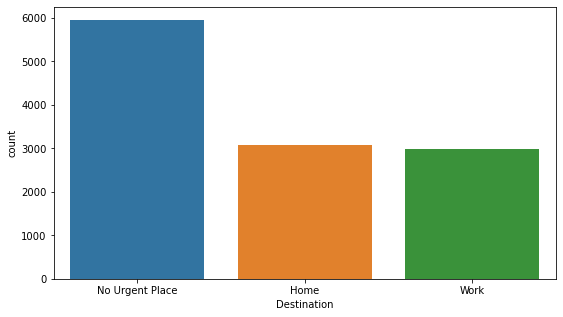

In [154]:
# checking the unique values
df['Destination'].unique()
# counting the uniques values
df['Destination'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Destination")

From the above count plot, we can see that we have higher counts for destination when it is not an urgent place followed by home and then work.

### 2.1.2) Unique values for Passanger column

<AxesSubplot:xlabel='Passanger', ylabel='count'>

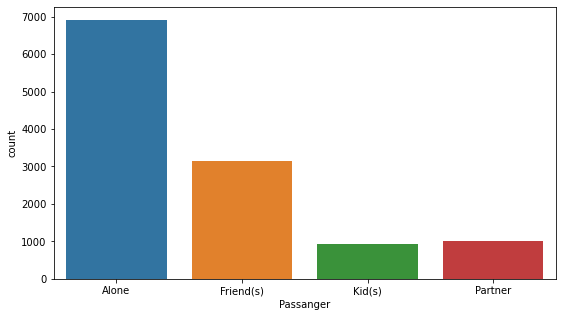

In [155]:
# checking the unique values
df['Passanger'].unique()
# counting the uniques values
df['Passanger'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Passanger")

From the above plot, we can see that we have higher counts for Passenger when it is alone followed by friends, partner and then kids.

### 2.1.3) Unique values for Weather column

<AxesSubplot:xlabel='Weather', ylabel='count'>

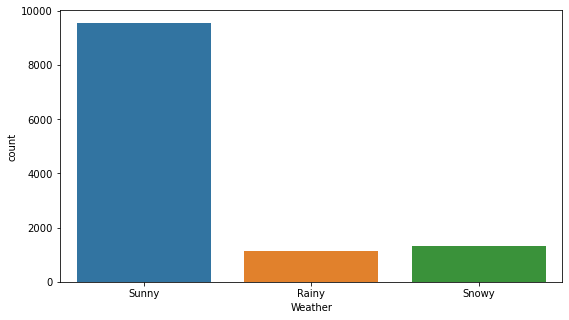

In [156]:
# checking the unique values
df['Weather'].unique()
# counting the uniques values
df['Weather'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Weather")

From the above plot, we can see that we have higher counts for weather when it is sunny followed by snowy and then rainy weather.

### 2.1.4) Unique values for Temperature column

<AxesSubplot:xlabel='Temperature', ylabel='count'>

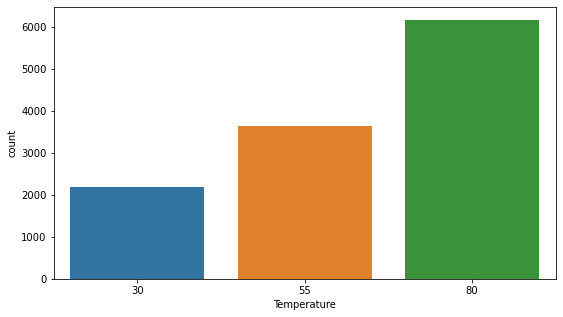

In [157]:
# checking the unique values
df['Temperature'].unique()
# counting the uniques values
df['Temperature'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Temperature")

From the above plot, we can see that we have higher counts for temperature when it is 80.

### 2.1.5) Unique values for Time(in_AM)

<AxesSubplot:xlabel='Time(in_AM)', ylabel='count'>

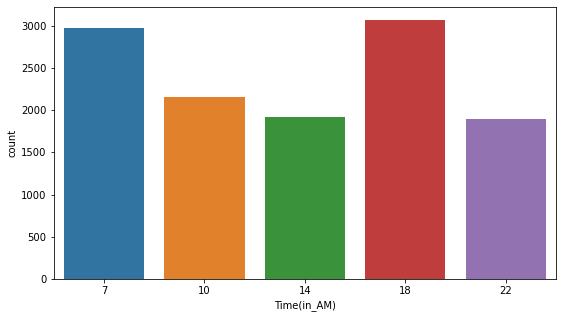

In [158]:
# checking the unique values
df['Time(in_AM)'].unique()
# counting the uniques values
df['Time(in_AM)'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Time(in_AM)")

From the above plot, we can see that we have higher counts for Time when it is 18 AM that is 6 PM followed by 7AM.

### 2.1.6) Unique values for Age

<AxesSubplot:xlabel='Age', ylabel='count'>

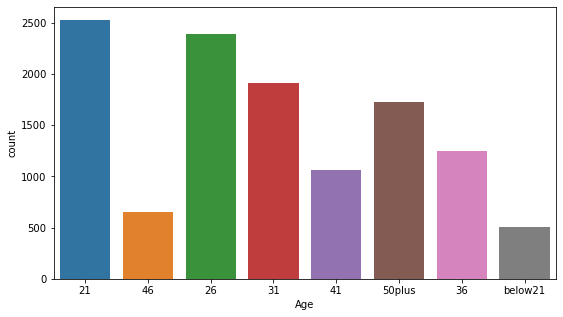

In [159]:
# checking the unique values
df['Age'].unique()
# counting the uniques values
df['Age'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Age")

From here, we can see that we have higher number of counts when age is 21 followed by 26.

### 2.1.7) Unique values for Coupon

<AxesSubplot:xlabel='Coupon', ylabel='count'>

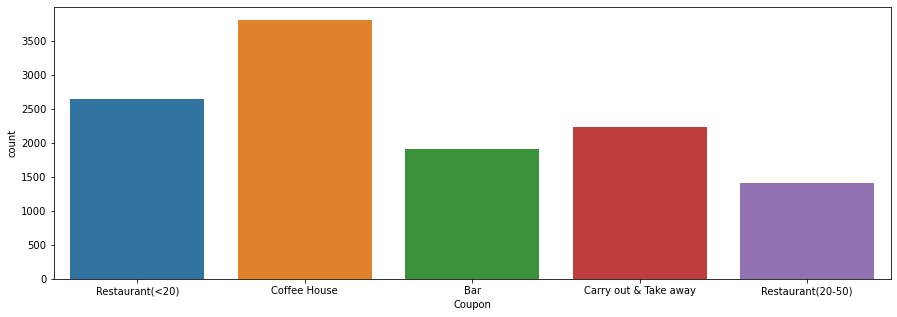

In [160]:
# checking the unique values
df['Coupon'].unique()
# counting the uniques values
df['Coupon'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="Coupon")

From here, we can see that we have higher number of counts when coupon is from Coffee House followed by Restaurant(<20).

### 2.1.8) Unique values for People having children

<AxesSubplot:xlabel='Has_children', ylabel='count'>

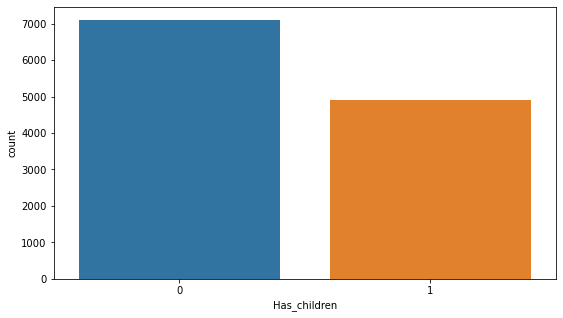

In [161]:
# checking the unique values
df['Has_children'].unique()
# counting the uniques values
df['Has_children'].value_counts()
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Has_children")


From here, we can see that we have higher counts when people donot have children.

## 2.2) Multivariate Analysis

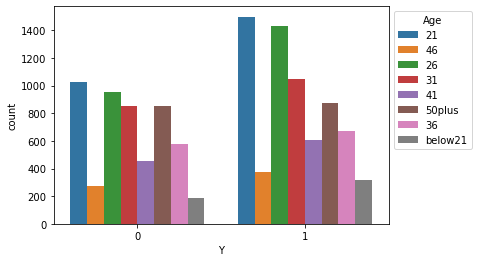

In [162]:
# plot for relationship between Y and Age
p = sns.countplot(data=df, x='Y', hue='Age')
p.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that young people, specifically under 35 are highly likely to interact with coupons. They are more likely to accept the coupons as well as to not accept them as compared to the people above 35 years of age.

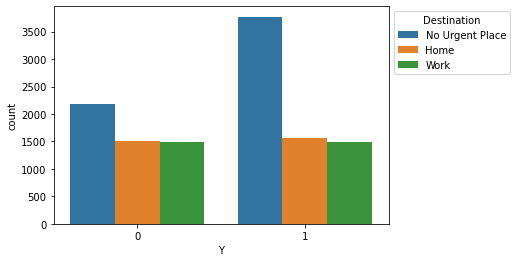

In [163]:
# plot for relationship between Y and Destination
p = sns.countplot(data=df, x='Y', hue='Destination')
p.legend(title='Destination', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that people with no urgent destination, are highly likely to interact with coupons. They are more likely to accept the coupons as well as to not accept them as compared to the people having destination as home or work.

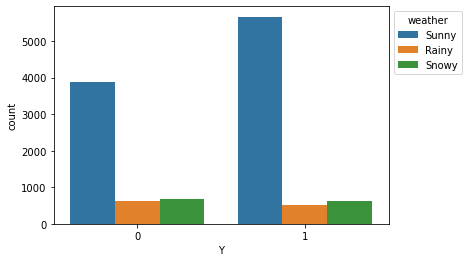

In [164]:
# plot for relationship between Y and Weather
p = sns.countplot(data=df, x='Y', hue='Weather')
p.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that people in weather, specifically in sunny weather are highly likely to interact with coupons. They are more likely to accept the coupons as well as to not accept them as compared to the people in rainy and snowy weather.

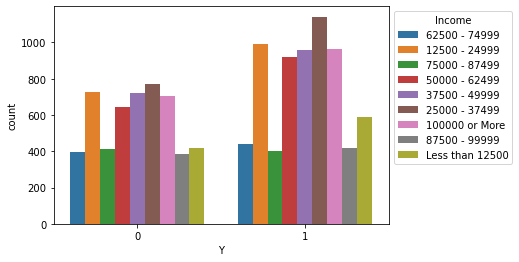

In [165]:
# plot for relationship between Y and 
p = sns.countplot(data=df, x='Y', hue='Income')
p.legend(title='Income', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that people having income, specifically between 25000-37499 are highly likely to interact with coupons. They are more likely to accept the coupons as well as to not accept them as compared to the people having income from 12500-24999. People having income from 75000-87499, are somewhat likely to not to accept the coupons.

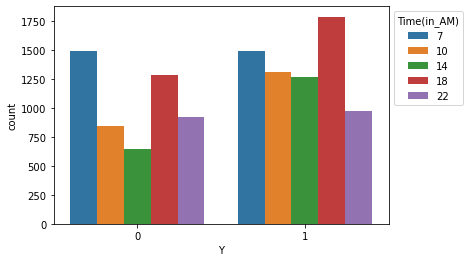

In [166]:
# plot for relationship between Y and Time
p = sns.countplot(data=df, x='Y', hue='Time(in_AM)')
p.legend(title='Time(in_AM)', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that people at time, specifically at 18 PM are highly likely to accept the coupons. They are less likely to accept the coupons when time is 14PM, 10AM.

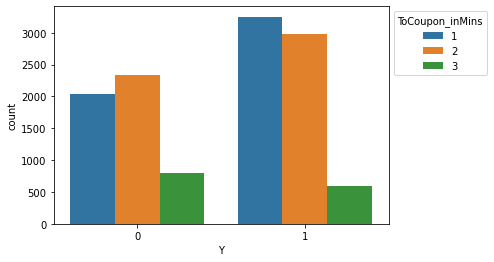

In [167]:
# plot for relationship between Y and toCoupon(in_Mins)
p = sns.countplot(data=df, x='Y', hue='ToCoupon_inMins')
p.legend(title='ToCoupon_inMins', bbox_to_anchor=(1, 1), loc='upper left')


From above graph, the graph shows that driving the distance to use the coupon, specifically when distance is greather than 5 mins are highly likely to interact with coupons. They are more likely to accept the coupons as well as to not accept them as compared to the distance greater than 15 mins.

## 3) Feature Engineering

## Converting categorical to dummies

In [168]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Temperature,Expiration,Has_children,Direction_same,Y,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),...,Carryaway_less1,Carryaway_never,Restaurantlessthan20_4~8,Restaurantlessthan20_gt8,Restaurantlessthan20_less1,Restaurantlessthan20_never,Restaurant20to50_4~8,Restaurant20to50_gt8,Restaurant20to50_less1,Restaurant20to50_never
0,55,1.000,0,0,1,14,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,80,0.084,0,0,0,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,80,1.000,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,80,0.084,0,0,0,10,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,80,1.000,0,0,0,14,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [169]:
# Check for null again
df1.isnull().sum().sum()

0

### 3.1) Defining the predictors/features (X) and outcome/predictions (Y)

In [170]:
features = df1.drop(['Y'], axis=1)
target = df1['Y']
features.describe()

,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Passanger_Kid(s),...,Carryaway_less1,Carryaway_never,Restaurantlessthan20_4~8,Restaurantlessthan20_gt8,Restaurantlessthan20_less1,Restaurantlessthan20_never,Restaurant20to50_4~8,Restaurant20to50_gt8,Restaurant20to50_less1,Restaurant20to50_never
count,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,...,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000
mean,63.301408,0.595288,0.408845,0.215957,13.832764,1.675772,0.495794,0.247855,0.261681,0.077705,...,0.148497,0.010827,0.285167,0.106771,0.165154,0.014575,0.056967,0.021987,0.485134,0.171233
std,19.131641,0.454908,0.491641,0.411502,5.402230,0.672066,0.500003,0.431785,0.439568,0.267717,...,0.355606,0.103492,0.451513,0.308835,0.371335,0.119848,0.231789,0.146648,0.499800,0.376729
min,30.000000,0.084000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.084000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,1.000000,0.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,1.000000,1.000000,0.000000,18.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,22.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2) Feature Transformation
 In our case, dummy coding transform is used and it tranforms one feature into m-1 features.

### 3.2.1) Converting categorical to dummies

In [171]:
# drop first category is used to avoid the singularity of the matrix
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Temperature,Expiration,Has_children,Direction_same,Y,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),...,Carryaway_less1,Carryaway_never,Restaurantlessthan20_4~8,Restaurantlessthan20_gt8,Restaurantlessthan20_less1,Restaurantlessthan20_never,Restaurant20to50_4~8,Restaurant20to50_gt8,Restaurant20to50_less1,Restaurant20to50_never
0,55,1.000,0,0,1,14,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,80,0.084,0,0,0,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,80,1.000,0,0,1,10,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,80,0.084,0,0,0,10,2,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,80,1.000,0,0,0,14,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


### 3.3) Feature Selection
There are some feature selection techniques that are used to select the feature for further analysis.

In [172]:
from sklearn import metrics
fSel = [] # selection technique used
fScal = [] # scaling technique used
fNum = [] # number of features selected

### 3.3.1) Using Variance Threshold

In [173]:
vt = VarianceThreshold(threshold=.15)
vt.fit(features)
pd.DataFrame({'variance': vt.variances_, 'select_feature': vt.get_support()}, index=features.columns).T

,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Passanger_Kid(s),...,Carryaway_less1,Carryaway_never,Restaurantlessthan20_4~8,Restaurantlessthan20_gt8,Restaurantlessthan20_less1,Restaurantlessthan20_never,Restaurant20to50_4~8,Restaurant20to50_gt8,Restaurant20to50_less1,Restaurant20to50_never
variance,365.98919,0.206924,0.241691,0.16932,29.18166,0.451635,0.249982,0.186423,0.193204,0.071667,...,0.126445,0.01071,0.203847,0.095371,0.137878,0.014362,0.053722,0.021504,0.249779,0.141913
select_feature,True,True,True,True,True,True,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


The features mentioning "True" are used for further analysis.

In [174]:
features_1 = features.iloc[:,vt.get_support()]
print(features_1.shape)
features_1.head()



(12007, 28)


,Temperature,Expiration,Has_children,Direction_same,Time(in_AM),ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Sunny,...,Education_Some college - no degree,Occupation_business_&_education,Occupation_others,Bar_less1,Bar_never,Coffeehouse_less1,Coffeehouse_never,Carryaway_4~8,Restaurantlessthan20_4~8,Restaurant20to50_less1
0,55,1.000,0,0,14,1,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
1,80,0.084,0,0,10,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
2,80,1.000,0,0,10,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
3,80,0.084,0,0,10,2,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1
4,80,1.000,0,0,14,1,1,0,1,1,...,0,0,0,0,1,1,0,1,1,1


Here, it shows that 28 features are selected for further analysis.

### 3.3.2) Using SelectKBest with f_classif

In [175]:
kbest = SelectKBest(score_func=f_classif, k=15)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

df_kbest = kbest.fit_transform(X_train, y_train)
features_2 = features.iloc[:,kbest.get_support()]
features_2.head()

,Expiration,ToCoupon_inMins,Destination_No Urgent Place,Destination_Work,Passanger_Friend(s),Weather_Snowy,Weather_Sunny,Coupon_Carry out & Take away,Coupon_Coffee House,Coupon_Restaurant(20-50),Coupon_Restaurant(<20),Maritalstatus_Single,Bar_never,Coffeehouse_never,Carryaway_less1
0,1.000,1,1,0,0,0,1,0,0,0,1,1,1,0,0
1,0.084,1,1,0,1,0,1,0,1,0,0,1,1,0,0
2,1.000,1,1,0,1,0,1,0,0,0,0,1,1,0,0
3,0.084,2,1,0,1,0,1,1,0,0,0,1,1,0,0
4,1.000,1,1,0,1,0,1,0,1,0,0,1,1,0,0


When we used the selectKbest selection technique, we can see that 15 features are selected for our further analysis.

## 3.4) Feature Scaling

### 3.4.1) Using Standard Scaler

### 3.4.1.1) Scaling the features selected by Variance threshold

In [176]:
# making the copy of the dataframe
scaled_features = features_1.copy()
# as only those features do not have value in -1 to 1, so these are scaled as others has value in between 0 to 1. So there is no need to scale those. 
col_names = ['Temperature', 'Expiration', 'ToCoupon_inMins', 'Time(in_AM)']
features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

scaled_features
fSel.append("Variance Threshold")
fScal.append("Standard Scaler")
fNum.append("28")

### 3.4.1.2) Scaling the features selected by SelectKBest with f_classif

In [177]:
# making the copy of the dataframe
scaled_features1 = features_2.copy()
# as only those features do not have value in -1 to 1, so these are scaled as others has value in between 0 to 1. So there is no need to scale those. 
col_names1 = ['Expiration', 'ToCoupon_inMins']
features = scaled_features1[col_names1]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features1[col_names1] = features

scaled_features1
fSel.append("SelectKBest with f_classif")
fScal.append("StandardScaler")
fNum.append("15")

### 3.4.2) Using Robust Scaler

### 3.4.2.1) Scaling the features selected by Variance threshold

In [178]:
# making the copy of the dataframe
scaled_features2 = features_1.copy()
# as only those features do not have value in -1 to 1, so these are scaled as others has value in between 0 to 1. So there is no need to scale those. 
col_names2 = ['Temperature', 'Expiration', 'ToCoupon_inMins', 'Time(in_AM)']
features = scaled_features2[col_names2]

# here Robust scaler is used
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features2[col_names2] = features

scaled_features2

fSel.append("Variance Threshold")
fScal.append("Robust Scaler")
fNum.append("28")

### 3.4.2.2) Scaling the features selected by SelectKBest with f_classif

In [179]:
# making the copy of the dataframe
scaled_features3 = features_2.copy()
# as only those features do not have value in -1 to 1, so these are scaled as others has value in between 0 to 1. So there is no need to scale those. 
col_names3 = ['Expiration', 'ToCoupon_inMins']
features = scaled_features3[col_names3]

# here Robust scaler is used
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features3[col_names3] = features

scaled_features3

fSel.append("SelectKBest with f_classif")
fScal.append("Robust Scaler")
fNum.append("15")

In [182]:
result = np.vstack((fSel, fScal, fNum)).T
result_df = pd.DataFrame(result, columns=['fSel', 'fScal', 'fNum'])


## 4) Saving cleaned and transformed dataset

In [183]:
# prepared dataset is saved in csv file
df1.to_csv("Dataset/Project_GSh43374_prepared.csv", index=False)